
# Comparasion of Different Canonical Coordinates
## Author
Brandon Behring

W


In [1]:
using DifferentialEquations
using PyCall
# pygui(:qt)
using PyPlot
include("PSS_Definitions_Dimer.jl")
# pygui(true);
using Roots

H=.2

global count=1


function Q1_find_dimer(Q2,P2,H_dimer)
    Q1_to_find(Q1)=Hamiltonian_Dimer([Q1,Q2],[0,P2],1)-H_dimer
    try
        Q1=find_zero(Q1_to_find,.01,maxeval=100,maxfnevals=300,tol=1e-15)
     catch
        Q1=zeros(0)
    end
end
H=.1
# Yfind(h)=sqrt(h/(2h+1));
# P=Yfind(H)

In [2]:
# Y=Yfind(H)0.23529411764705893
P=.1
Q1=Q1_find_dimer(.2,.4,H)
t_end=1000.0;
q0,p0=[zeros(2) for i in 1:2]
q0[1]=Q1; 
q0[2]=.2; 
p0[1]=0; 
p0[2]=.4;
Hamiltonian_Dimer(q0,p0,1)

0.09999999999999998

In [3]:
prob= HamiltonianProblem{true}(Hamiltonian_Dimer, q0, p0, (0., t_end));
@time t,A=solve(prob, Vern9(),reltol=1e-13,abstol=1e-15,maxiters=1e15);

 22.584147 seconds (97.55 M allocations: 3.761 GiB, 10.79% gc time)


In [4]:
q1=A[1,:]
q2=A[2,:]
p1=A[3,:]
p2=A[4,:];

In [5]:
Q1=(q1+q2)/sqrt(2)
Q2=(q1-q2)/sqrt(2)
P1=(p1+p2)/sqrt(2)
P2=(p1-p2)/sqrt(2);

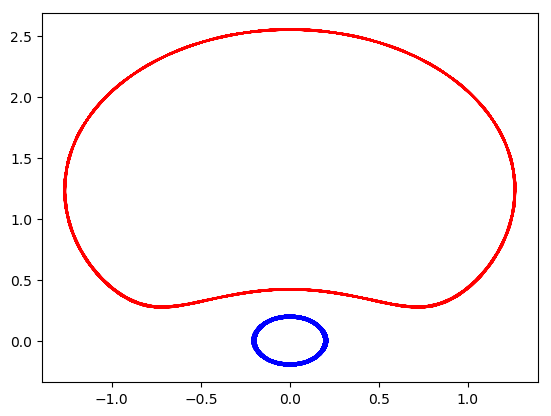

In [6]:
plot(q1,p1,"b")
plot(q2,p2,"r");

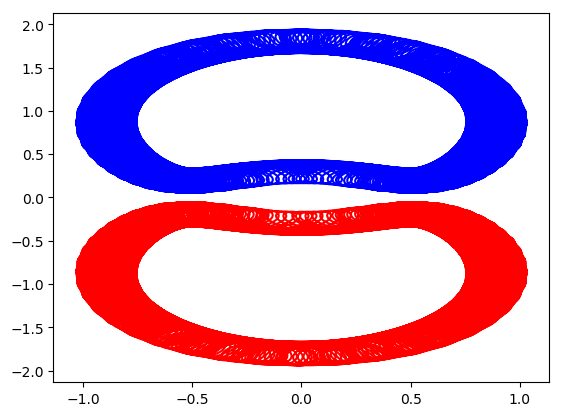

In [7]:
plot(Q1,P1,"b")
plot(Q2,P2,"r");

In [8]:
# max_hits=500
# condition_max_hits(u,t,integrator)= count>max_hits
# affect_stop!(integrator) = terminate!(integrator)
function condition_hits_PSS(u,t,integrator) # Event when event_f(u,t) == 0
   u[3]
end
function affect_update_iterator!(integrator)
end;

# callback_max_hits=DiscreteCallback(condition_max_hits,affect_stop!)
callback_hits_PSS=ContinuousCallback(condition_hits_PSS, affect_update_iterator!,nothing)
# cb=CallbackSet(callback_hits_PSS, callback_max_hits)
cb=CallbackSet(callback_hits_PSS);

0.2
 

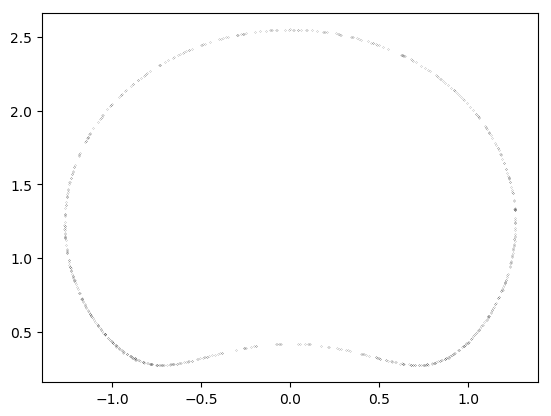

 3.414161 seconds (18.32 M allocations: 724.577 MiB, 7.63% gc time)


In [9]:
# t_end=1e4;
@time Q_PSS,P_PSS=PSS_function( q0[2], p0[2], H, t_end);
plot(Q_PSS,P_PSS,".", markersize=.1, c
    ="k");

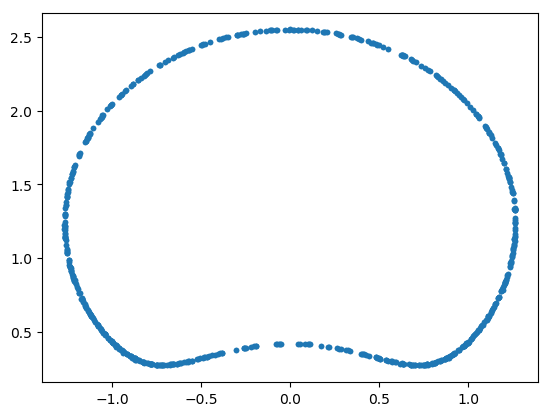

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f52d40fc550>

In [10]:
plot(Q_PSS,P_PSS,".")

In [11]:
Q1


17109-element Array{Float64,1}:
  0.28936596894744365
  0.2893657660476369 
  0.2893645269832822 
  0.2893566640945715 
  0.2893170580456311 
  0.2892103890325617 
  0.2888828672015505 
  0.28817080781664783
  0.28609566736619735
  0.282466740596801  
  0.274698936517984  
  0.25977621763618786
  0.24273042243940937
  ⋮                  
 -0.43407446109604075
 -0.41042028611609277
 -0.385484663613609  
 -0.3612258128737478 
 -0.33509229397112805
 -0.3078193099443701 
 -0.28370383361147405
 -0.2578031282395594 
 -0.2350150555916954 
 -0.21044242747066114
 -0.18973140694681498
 -0.18625309945428237

In [12]:
Q1=P1_find_dimer(0,.3,H)

UndefVarError: UndefVarError: P1_find_dimer not defined

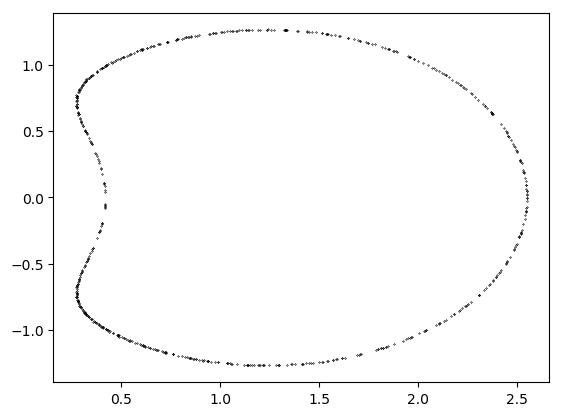

In [13]:
plot(P_PSS,Q_PSS,".", markersize=.5, c
    ="k");

In [14]:
Q1=Q1_find_dimer(.2,.4,H)


0.2092252777747067